# Proyecto Integrador IV
> E-Commerce Data Pipeline

En este notebook, primero ejecutaremos todos los componentes de nuestro pipeline ELT y luego realizaremos visualizaciones con la información resultante


In [1]:
# Importing the necessary libraries
from pandas import DataFrame
from sqlalchemy import create_engine
from typing import Dict
from pathlib import Path

from src.transform import QueryEnum
from src import config
from src.transform import run_queries
from src.extract import extract
from src.load import load
from src.plots import (
    plot_freight_value_weight_relationship,
    plot_global_amount_order_status,
    plot_real_vs_predicted_delivered_time,
    plot_revenue_by_month_year,
    plot_revenue_per_state,
    plot_top_10_least_revenue_categories,
    plot_top_10_revenue_categories,
    plot_top_10_revenue_categories_ammount,
    plot_delivery_date_difference,
    plot_order_amount_per_day_with_holidays,
)

In [2]:
# Create the database sql file
Path(config.SQLITE_BD_ABSOLUTE_PATH).touch()

# Create the database connection
ENGINE = create_engine(rf"sqlite:///{config.SQLITE_BD_ABSOLUTE_PATH}", echo=False)

### 1. Extract

Aquí estarás extrayendo la información de las fuentes.

In [3]:
csv_folder = config.DATASET_ROOT_PATH
public_holidays_url = config.PUBLIC_HOLIDAYS_URL

# 1. Get the mapping of the csv files to the table names.
csv_table_mapping = config.get_csv_to_table_mapping()

# 2. Extract the data from the csv files, holidays and load them into the dataframes.
csv_dataframes = extract(csv_folder, csv_table_mapping, public_holidays_url)

### 2. Load

Usando los diferentes conjuntos de datos proporcionados, almacenarás todo en nuestro Data Warehouse.

In [4]:
load(data_frames=csv_dataframes, database=ENGINE)

✅ Tabla 'olist_customers' cargada con éxito en la base de datos.
✅ Tabla 'olist_geolocation' cargada con éxito en la base de datos.
✅ Tabla 'olist_order_items' cargada con éxito en la base de datos.
✅ Tabla 'olist_order_payments' cargada con éxito en la base de datos.
✅ Tabla 'olist_order_reviews' cargada con éxito en la base de datos.
✅ Tabla 'olist_orders' cargada con éxito en la base de datos.
✅ Tabla 'olist_products' cargada con éxito en la base de datos.
✅ Tabla 'olist_sellers' cargada con éxito en la base de datos.
✅ Tabla 'product_category_name_translation' cargada con éxito en la base de datos.
✅ Tabla 'public_holidays' cargada con éxito en la base de datos.


### 3. Transform

Aquí transformarás las diferentes consultas en tablas. Hay dos secciones: una con las consultas relacionadas con los ingresos y otra con las consultas relacionadas con las entregas.

##### 3.1 Queries sobre ingresos

In [5]:
query_results: Dict[str, DataFrame] = run_queries(database=ENGINE)
print(query_results.keys())


dict_keys(['delivery_date_difference', 'global_ammount_order_status', 'revenue_by_month_year', 'revenue_per_state', 'top_10_least_revenue_categories', 'top_10_revenue_categories', 'real_vs_estimated_delivered_time', 'orders_per_day_and_holidays_2017', 'get_freight_value_weight_relationship'])


In [6]:
# Transforming the revenue_by_month_year query to a table
revenue_by_month_year = query_results[QueryEnum.REVENUE_BY_MONTH_YEAR.value]
revenue_by_month_year

,month_no,month,Year2016,Year2017,Year2018
0,01,Ene,0.00,138488.04,1115004.18
1,02,Feb,0.00,291908.01,992463.34
2,03,Mar,0.00,449863.60,1159652.12
3,04,Abr,0.00,417788.03,1160785.48
4,05,May,0.00,592918.82,1153982.15
5,06,Jun,0.00,511276.38,1023880.50
6,07,Jul,0.00,592382.92,1066540.75
7,08,Ago,0.00,674396.32,1022425.32
8,09,Sep,252.24,727762.45,4439.54
9,10,Oct,59090.48,779677.88,589.67


In [7]:
# Transforming the top_10_revenue_categories query to a table
top_10_revenue_categories = query_results[QueryEnum.TOP_10_REVENUE_CATEGORIES.value]
top_10_revenue_categories

,Category,Num_order,Revenue
0,health_beauty,8647,1233131.72
1,watches_gifts,5493,1165898.98
2,bed_bath_table,9272,1023434.76
3,sports_leisure,7529,954673.55
4,computers_accessories,6529,888613.62
5,furniture_decor,6307,711927.69
6,housewares,5743,615628.69
7,cool_stuff,3559,610204.10
8,auto,3809,578849.35
9,toys,3803,471097.49


In [8]:
# Transforming the top_10_least_revenue_categories query to a table
top_10_least_revenue_categories = query_results[
    QueryEnum.TOP_10_LEAST_REVENUE_CATEGORIES.value
]
top_10_least_revenue_categories

,Category,Num_order,Revenue
0,security_and_services,2,283.29
1,fashion_childrens_clothes,7,519.95
2,cds_dvds_musicals,12,730.00
3,home_comfort_2,24,760.27
4,flowers,29,1110.04
5,diapers_and_hygiene,25,1500.79
6,arts_and_craftmanship,23,1814.01
7,la_cuisine,13,2054.99
8,fashion_sport,26,2094.52
9,fashio_female_clothing,36,2634.94


In [9]:
# Transforming the revenue_per_state query to a table
revenue_per_state = query_results[QueryEnum.REVENUE_PER_STATE.value]
revenue_per_state

,customer_state,Revenue
0,SP,5769081.27
1,RJ,2055690.45
2,MG,1819277.61
3,RS,861608.40
4,PR,781919.55
5,SC,595208.40
6,BA,591270.60
7,DF,346146.17
8,GO,334294.22
9,ES,317682.65


##### 3.2 Queries sobre entregas

In [10]:
# Transforming the delivery_date_difference query to a table
delivery_date_difference = query_results[QueryEnum.DELIVERY_DATE_DIFFERECE.value]
delivery_date_difference

,Estado,Diferencia_Entrega
0,AC,20
1,RO,19
2,AP,19
3,AM,18
4,RR,16
5,RS,13
6,PA,13
7,MT,13
8,RN,12
9,PR,12


In [11]:
# Transforming the real vs predicted delivered time query to a table per month and year
real_vs_estimated_delivered_time = query_results[
    QueryEnum.REAL_VS_ESTIMATED_DELIVERED_TIME.value
]
real_vs_estimated_delivered_time

,month_no,month,Year2016_real_time,Year2017_real_time,Year2018_real_time,Year2016_estimated_time,Year2017_estimated_time,Year2018_estimated_time
0,01,Ene,NaN,12.647044,14.080563,NaN,39.508831,26.302555
1,02,Feb,NaN,13.168825,16.945138,NaN,31.848929,24.528996
2,03,Mar,NaN,12.951184,16.301410,NaN,24.732386,22.033067
3,04,Abr,NaN,14.917913,11.499241,NaN,27.349810,23.679546
4,05,May,NaN,11.322363,11.419029,NaN,24.284784,22.891488
5,06,Jun,NaN,12.011573,9.239216,NaN,24.021864,27.772740
6,07,Jul,NaN,11.592732,8.958636,NaN,23.317316,19.690127
7,08,Ago,NaN,11.147125,7.732780,NaN,23.480603,15.186330
8,09,Sep,54.813194,11.851007,NaN,18.488449,22.437366,NaN
9,10,Oct,19.600559,11.856700,NaN,55.676632,23.019536,NaN


In [12]:
# Transforming the global ammount of order status query to a table
global_ammount_order_status = query_results[QueryEnum.GLOBAL_AMMOUNT_ORDER_STATUS.value]
global_ammount_order_status

,estado_pedido,Cantidad
0,delivered,96478
1,shipped,1107
2,canceled,625
3,unavailable,609
4,invoiced,314
5,processing,301
6,created,5
7,approved,2


In [13]:
orders_per_day_and_holidays_2017 = query_results[
    QueryEnum.ORDERS_PER_DAY_AND_HOLIDAYS_2017.value]
orders_per_day_and_holidays_2017

,date,order_count,holiday
0,2017-01-05,32,False
1,2017-01-06,4,False
2,2017-01-07,4,False
3,2017-01-08,6,False
4,2017-01-09,5,False
...,...,...,...
356,2017-12-27,167,False
357,2017-12-28,146,False
358,2017-12-29,135,False
359,2017-12-30,97,False


In [14]:
freight_value_weight_relationship = query_results[
    QueryEnum.GET_FREIGHT_VALUE_WEIGHT_RELATIONSHIP.value
]
freight_value_weight_relationship


,order_id,total_freight_value,total_weight_g
0,00010242fe8c5a6d1ba2dd792cb16214,13.29,650.0
1,00018f77f2f0320c557190d7a144bdd3,19.93,30000.0
2,000229ec398224ef6ca0657da4fc703e,17.87,3050.0
3,00024acbcdf0a6daa1e931b038114c75,12.79,200.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,18.14,3750.0
...,...,...,...
96473,fffc94f6ce00a00581880bf54a75a037,43.41,10150.0
96474,fffcd46ef2263f404302a634eb57f7eb,36.53,8950.0
96475,fffce4705a9662cd70adb13d4a31832d,16.95,967.0
96476,fffe18544ffabc95dfada21779c9644f,8.72,100.0


### 4. Graficas de las tablas resultantes

Ahora, crearemos gráficos a partir de las diferentes consultas.

c:\Users\Entrerrios\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Entrerrios\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


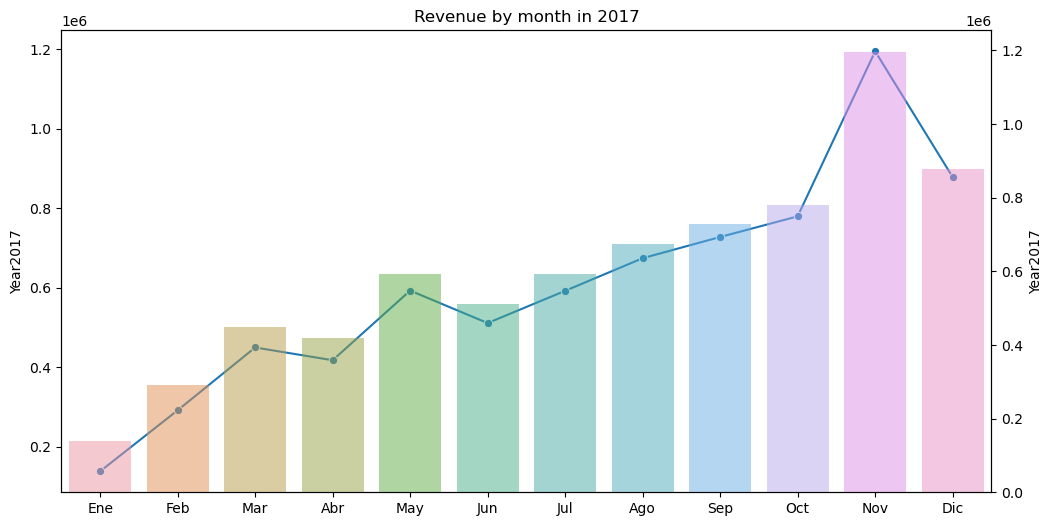

In [15]:
plot_revenue_by_month_year(revenue_by_month_year, 2017)

In [16]:
plot_top_10_revenue_categories(top_10_revenue_categories)

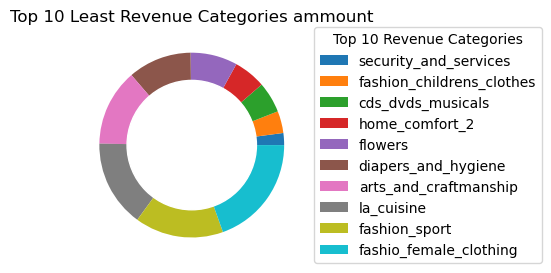

In [17]:
plot_top_10_least_revenue_categories(top_10_least_revenue_categories)

In [18]:
plot_revenue_per_state(revenue_per_state)

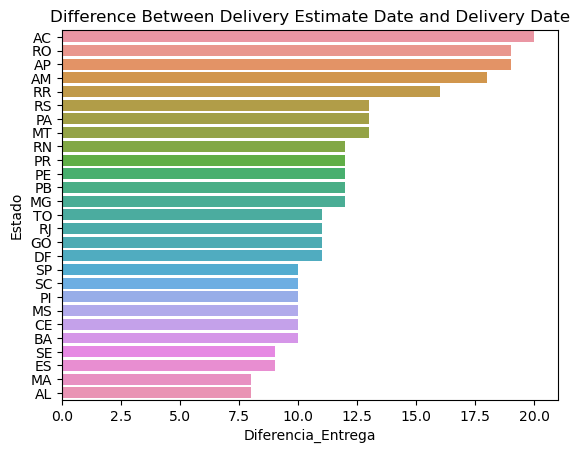

In [19]:
plot_delivery_date_difference(delivery_date_difference)


c:\Users\Entrerrios\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\Entrerrios\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\Entrerrios\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\Entrerrios\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



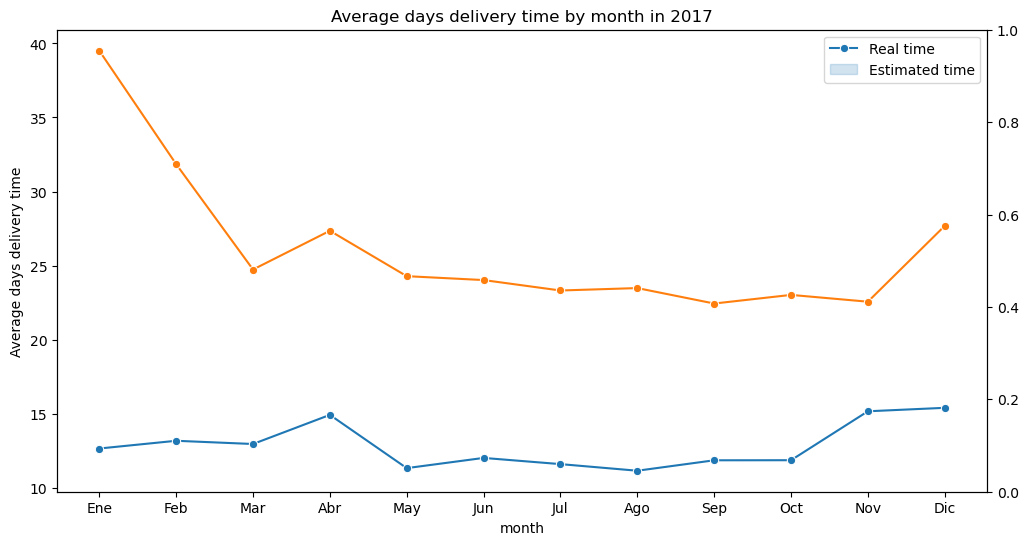

In [20]:
plot_real_vs_predicted_delivered_time(real_vs_estimated_delivered_time, year=2017)

In [21]:
print(global_ammount_order_status.columns)


Index(['estado_pedido', 'Cantidad'], dtype='object')


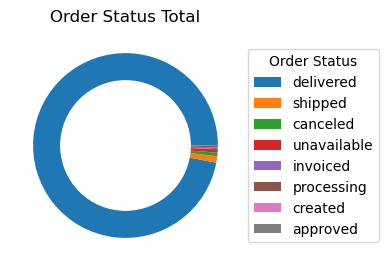

In [22]:
plot_global_amount_order_status(global_ammount_order_status)

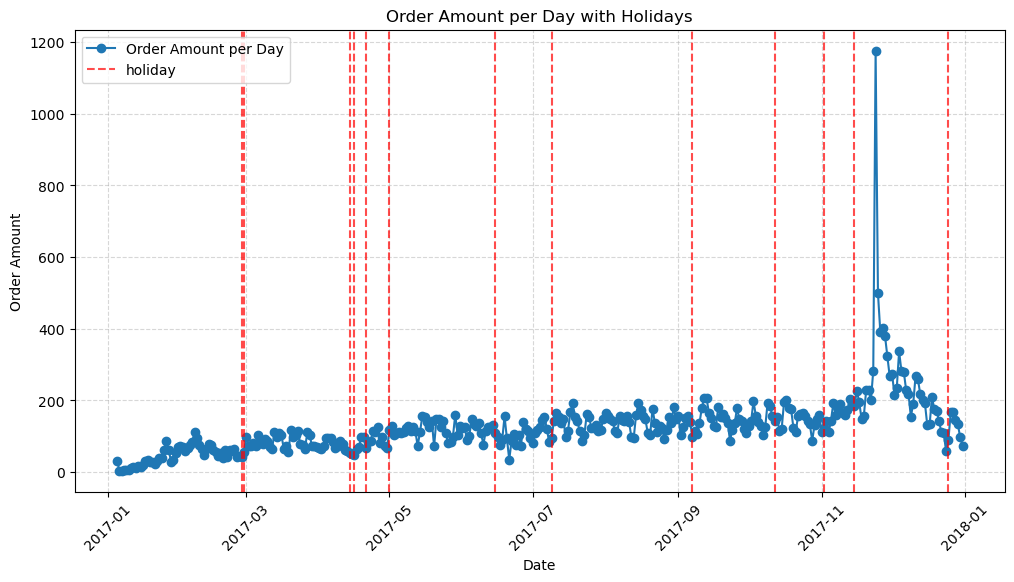

In [23]:
plot_order_amount_per_day_with_holidays(orders_per_day_and_holidays_2017)

El gráfico de Pedidos por Día y Días Festivos que programarás en **src/plots.py** debe ser similar a este:

![The plot you will code will be similar to this:](images/orders_per_day_and_holidays.png "Orders per Day and Holidays")

4.1 ¿Ves alguna relación entre los días festivos en Brasil durante 2017 y las compras de ese año?

Respuesta: ________

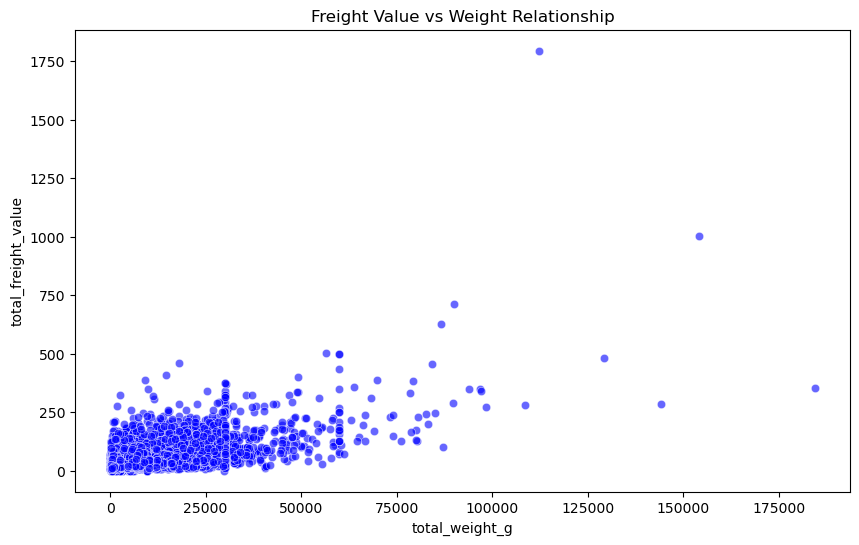

In [24]:
plot_freight_value_weight_relationship(freight_value_weight_relationship)

El gráfico sobre la relación entre el valor del flete y el peso del producto que debes programar en `src/plots.py` tiene que ser similar a este:

![The plot you will code will be similar to this:](images/freight_value_weight_relationship.png "Freight Value and Weight Relationship")

4.2 ¿Ves alguna correlación entre el valor del flete y el peso del producto?

Respuesta:____